In [15]:
from pathlib import Path
import json
from more_itertools import with_iter
import pandas as pd
import numpy as np
from functools import partial
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [3]:
annotations_path = Path('data/annotations')
afields = []

In [4]:
s1ar = []
for p in annotations_path.glob('*STATS-1.json'):
    with open(p) as po:
        pot = json.load(po)
        s1ar.append(pot)
s1ar = [[{k:v for k,v in s.items() if k in {'points','label'}} for s in a['shapes']] for a in s1ar]

In [5]:
s = []
for l in s1ar:
    for k in l:
        s.append(k)
s = pd.DataFrame(s)

In [145]:
x = (s[s['label']=='1 right name'])['points'].map(lambda l: cv2.boundingRect(np.array(l)))
x,y, dx, dy = list(map(int,np.mean(np.array(list(x.map(list)),dtype='int'), axis=0)))
x, y, dx, dy

(348, 330, 204, 74)

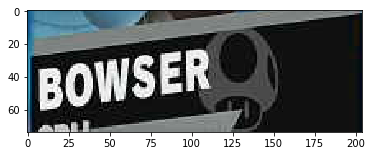

In [146]:
image = cv2.imread('data/images/2019-03-14T16_25_31.967755-882-STATS-1.png')
roi = image[y:y+dy,x:x+dx]
plt.imshow(roi)

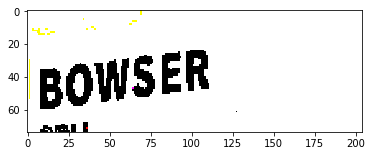

In [147]:
rv, i = cv2.threshold(roi, 180, 255, cv2.THRESH_BINARY_INV)
plt.imshow(i)

In [148]:
config = ("-l eng --oem 1 --psm 7")
pytesseract.image_to_string(i, config=config)

'BOWSER'

In [ ]:
# Need to use tesserac t"bazaar" and user words + patterns